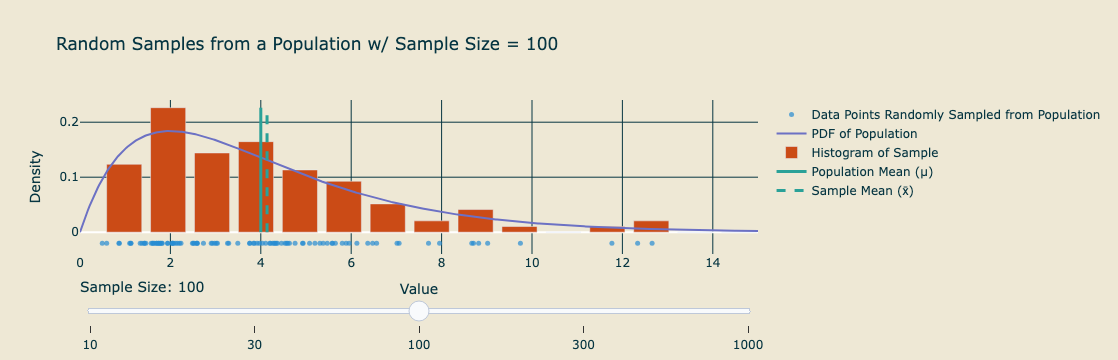

In [10]:
# Function to generate the interactive Chi-Squared plot with Solarized theme refinements
def generate_interactive_chi_square_with_swarm():
    # Parameters
    initial_sample_size = 100
    sample_sizes = [10, 30, 100, 300, 1000]  # Slider options
    df = 4  # Fixed degrees of freedom
    x = np.linspace(0, 15, 500)  # Adjusted PDF range
    mu = df  # Population mean for Chi-Squared distribution

    # Function to generate data
    def generate_data(sample_size):
        y_pdf = chi2.pdf(x, df=df)
        sample = np.random.chisquare(df=df, size=sample_size)
        sample_mean = np.mean(sample)  # Sample mean
        hist, bins = np.histogram(sample, bins=20, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        return y_pdf, sample, hist, bin_centers, sample_mean

    # Initial data
    y_pdf, sample, hist, bin_centers, sample_mean = generate_data(initial_sample_size)

    # Create figure
    fig = go.Figure()

    # Swarm Plot (Scatter representation of sample points)
    fig.add_trace(go.Scatter(
        x=sample,
        y=np.zeros_like(sample) - 0.02,  # Offset slightly for visibility
        mode='markers',
        marker=dict(color=solarized_blue, size=5, opacity=0.7),
        name="Data Points Randomly Sampled from Population"
    ))

    # Add PDF line with a new color (Solarized violet)
    fig.add_trace(go.Scatter(
        x=x,
        y=y_pdf,
        mode='lines',
        name="PDF of Population",
        line=dict(color=solarized_violet)
    ))

    # Add histogram
    fig.add_trace(go.Bar(
        x=bin_centers,
        y=hist,
        name="Histogram of Sample",
        marker=dict(color=solarized_orange)
    ))

    # Determine the max y-value for full y-axis range lines
    max_y = max(max(y_pdf), max(hist))

    # Add population mean (\mu) indicator (cyan, solid line)
    fig.add_trace(go.Scatter(
        x=[mu, mu],
        y=[0, max_y],
        mode='lines',
        name="Population Mean (μ)",
        line=dict(color=solarized_cyan, dash="solid", width=3)
    ))

    # Add sample mean (\bar{x}) indicator (cyan, dashed line)
    fig.add_trace(go.Scatter(
        x=[sample_mean, sample_mean],
        y=[0, max_y],
        mode='lines',
        name="Sample Mean (x̄)",
        line=dict(color=solarized_cyan, dash="dash", width=3)
    ))

    # Slider steps
    steps = []
    for sample_size in sample_sizes:
        y_pdf, sample, hist, bin_centers, sample_mean = generate_data(sample_size)
        max_y = max(max(y_pdf), max(hist))  # Update max y for each step
        steps.append({
            "label": str(sample_size),
            "method": "update",
            "args": [
                {
                    "x": [sample, x, bin_centers, [mu, mu], [sample_mean, sample_mean]],
                    "y": [np.zeros_like(sample) - 0.02, y_pdf, hist, [0, max_y], [0, max_y]]
                },
                {
                    "title": f"Random Samples from Chi-Squared Distribution (DF=4) w/ Sample Size = {sample_size}"
                }
            ]
        })

    # Update layout with Solarized theme refinements
    fig.update_layout(
        title=f"Random Samples from a Population w/ Sample Size = {initial_sample_size}",
        xaxis_title="Value",
        yaxis_title="Density",
        xaxis=dict(
            range=[0, 15],
            title_font=dict(color=solarized_base02),
            tickfont=dict(color=solarized_base02),
            gridcolor=solarized_base02  # Make horizontal grid lines base02
        ),
        yaxis=dict(
            title_font=dict(color=solarized_base02),
            tickfont=dict(color=solarized_base02),
            gridcolor=solarized_base02  # Make vertical grid lines base02
        ),
        plot_bgcolor=solarized_base2,  # Background color set to Solarized base2
        paper_bgcolor=solarized_base2,
        font=dict(color=solarized_base02),  # Set all text to Solarized base02
        sliders=[{
            "steps": steps,
            "active": sample_sizes.index(initial_sample_size),
            "currentvalue": {"prefix": "Sample Size: ", "font": {"size": 14, "color": solarized_base02}},
        }],
        showlegend=True
    )
    # Save as HTML
    fig.write_html("chi_squared_interactive.html", include_plotlyjs="cdn")
    return fig

# Generate and show the improved interactive plot with Solarized styling
fig = generate_interactive_chi_square_with_swarm()
fig.show()

